### Tarefa de consolidação do Conteúdo - Aprendizado de máquina 2024/1 - Josias Neves Jardim Borba

In [1]:
# Importa bibliotecas necessarias
import os, cv2, itertools  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt

# Exibicao de graficos diretamente no notebook
%matplotlib inline 

# Importa a classe LogisticRegressionCV da biblioteca scikit-learn
from sklearn.linear_model import LogisticRegressionCV  


Definição de variaveis

In [28]:
# Caminhos para os diretorios de imagens de treinamento e teste
TRAIN_DIR = './imgs/train/'
TEST_DIR = './imgs/test/'

# Dimensoes para redimensionar as imagens (64x64)
ROWS = 64  
COLS = 64  

# Numero de canais de cor (3 para RGB)
CHANNELS = 3

In [11]:
# Cria uma lista com os caminhos completos das imagens de treinamento
train_images = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR)]

# Cria uma lista com os caminhos completos das imagens de teste
test_images = [TEST_DIR + i for i in os.listdir(TEST_DIR)]

Criando as funções para ler a redimensionar a imagem e preparação de dados das imagens  - read_image, prep_data

In [12]:
# Funcao para ler e redimensionar uma imagem
def read_image(file_path):
    # Le a imagem do caminho fornecido em cores (RGB)
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    
    # Redimensiona a imagem para as dimensoes especificadas (ROWS x COLS)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [13]:
# Funcao para preparar os dados das imagens no formato necessario para o methodo de regressao logistica
def prep_data(images):

    # Numero de imagens
    n = len(images)

    # Numero total de pixels 
    n_px = ROWS * COLS * CHANNELS

    # Inicializa a matriz X com dimensoes (n_px, n) para armazenar as imagens
    X = np.ndarray((n_px, n), dtype=np.uint8)

    # Inicializa a matriz y com dimensoes (1, n) para armazenar os labels
    y = np.zeros((1, n))

    print("X.shape is {}".format(X.shape))

    # Itera sobre todas as imagens
    for i, image_file in enumerate(images):

        # Le e redimensiona a imagem
        image = read_image(image_file)
        # Redimensiona a imagem e adiciona na matriz X
        X[:, i] = np.squeeze(image.reshape((n_px, 1)))

        # Define o label baseado no nome do arquivo da imagem
        if 'dog' in image_file.lower():
            y[0, i] = 1

        elif 'cat' in image_file.lower():
            y[0, i] = 0
            
        else:
            y[0, i] = image_file.split('/')[-1].split('.')[0]

        # Imprime o progresso a cada 5000 imagens
        if i % 5000 == 0:
            print("Processed {} of {}".format(i, n))

    return X, y

In [14]:
# Prepara os dados das imagens de treinamento
X_train, y_train = prep_data(train_images)

# Prepara os dados das imagens de teste
X_test, test_idx = prep_data(test_images)

X.shape is (12288, 25000)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000
X.shape is (12288, 12500)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


In [15]:
# Imprime as dimensoes do conjunto de dados de treinamento
print("Train shape: {}".format(X_train.shape))

# Imprime as dimensoes do conjunto de dados de teste
print("Test shape: {}".format(X_test.shape))

Train shape: (12288, 25000)
Test shape: (12288, 12500)


In [16]:
classes = {0: 'cats', 1: 'dogs'}

Criando as funções para mostrar as imagens

In [39]:
# Funcao para exibir uma imagem e seu label correspondente (Sem usar o modelo treinado)
def show_images(X, y, idx):
    # Obtém a imagem no índice fornecido
    image = X[idx]
    
    # Redimensiona a imagem para suas dimensões originais (ROWS x COLS x CHANNELS)
    image = image.reshape((ROWS, COLS, CHANNELS))

    # Configura o tamanho da figura para exibição
    plt.figure(figsize=(4, 2))
    
    # Mostra a imagem utilizando matplotlib
    plt.imshow(image)
  
    # Define o título da imagem com base no label correspondente
    plt.title("This image has {}".format(classes[y[idx, 0]]))
    plt.show()

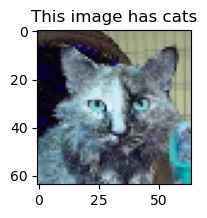

In [40]:
# Chama a função para exibir uma imagem do conjunto de treinamento
show_images(X_train.T, y_train.T, 2)

In [29]:
# Funcao para exibir uma imagem e a sua previsao de classe com base no modelo treinado
def show_image_prediction(X, idx, model):

    # Obtém a imagem no índice fornecido e a redimensiona para uma linha
    image = X[idx].reshape(1, -1)

    # Realiza a previsao da classe utilizando o modelo fornecido
    image_class = classes[model.predict(image).item()]

    # Redimensiona a imagem para suas dimensoes originais (ROWS x COLS x CHANNELS)
    image = image.reshape((ROWS, COLS, CHANNELS))
    
    # Configura o tamanho da figura para exibicao
    plt.figure(figsize=(4, 2))

    # Mostra a imagem utilizando matplotlib
    plt.imshow(image)
    
    # Define o título da imagem com a previsao de classe
    plt.title("Test {} : I think this image has {}".format(idx, image_class))
    plt.show()

Implementação da regressão logistica

In [23]:
# Instancia um classificador de Regressao Logistica com validacao cruzada
clf = LogisticRegressionCV()

# Transpoe os dados de treinamento para adequar ao formato do modelo
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()

In [24]:
clf.fit(X_train_lr, y_train_lr)

c:\Users\jojar\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jojar\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

LogisticRegressionCV()

In [32]:
# Imprime a precisao do modelo de Regressao Logistica em porcentagem
print("Model precision: {:.2f}%".format(clf.score(X_train_lr, y_train_lr) * 100))

Model precision: 72.65%


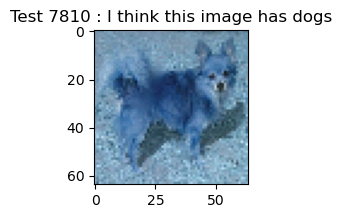

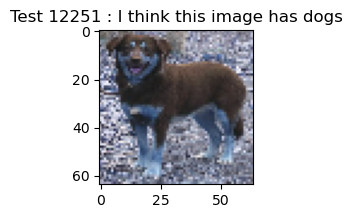

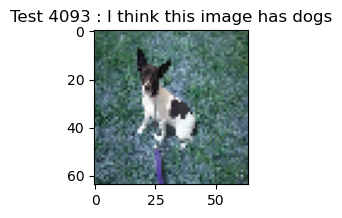

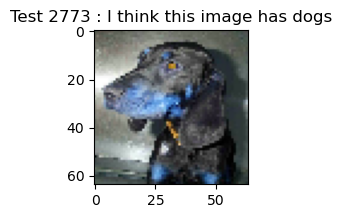

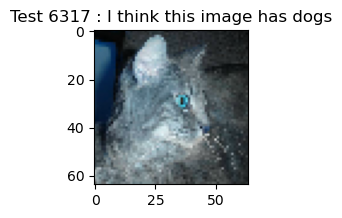

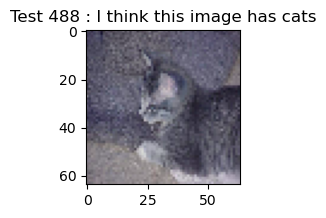

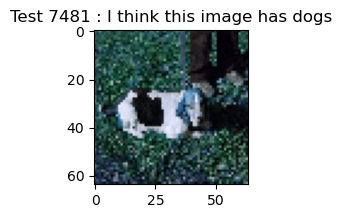

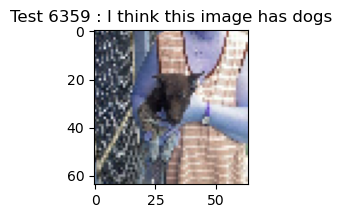

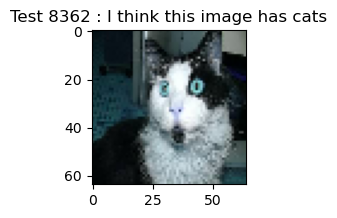

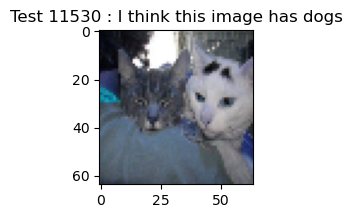

In [41]:
# Transpoe os dados de teste para adequar ao formato do modelo
X_test_lr, test_idx = X_test.T, test_idx.T

# Itera sobre 10 indices aleatorios do conjunto de teste e exibe as previsoes
for i in np.random.randint(0, len(X_test_lr), 10):
    show_image_prediction(X_test_lr, i, clf)